In [2]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

import parameter_tuning as pt

%load_ext autoreload
%autoreload 2

In [3]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.65,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
               'Iinit': 0.8,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 500,
              'delay': 500}

In [4]:
stimulus_range_s = [400, 450, 500, 550, 600, 650, 700]
stimulus_range_l = [700, 750, 800, 850, 900, 950, 1000]

In [5]:
stimulus_lst_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_lst_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

In [11]:
srange = 'short'
K_lst = True
th_lst = [0.7]
tau = True
delay_lst = [700]

search_space = pt.create_search_space(srange, K_lst, th_lst, tau, delay_lst)

280


# Parameter Space (K 0.5-10, sigma = 0.01)

In [6]:
K_lst = np.arange(0.5, 10.5, 0.5)
th_lst = np.arange(0.6, 0.75, 0.01)
delay_lst = np.arange(400, 1000, 50)
tau = np.arange(60, 200, 10)

print(len(K_lst), len(th_lst), len(delay_lst), len(tau))

20 16 12 14


In [7]:
path = '../results/'
short_ktau07, long_ktau07 = pt.load_data(path+'SHORT_K1-10TAU_th07_del700-20220526-155150-output.pickle', 
                                      path+'LONG_K1-10TAU_th07_del700-20220526-160145-output.pickle')
short_ktau06, long_ktau06 = pt.load_data(path+'SHORT_K1-10TAU_th06_del700-20220526-152721-output.pickle',
                                      path+'LONG_K1-10TAU_th06_del700-20220526-153708-output.pickle')
short_ktau08, long_ktau08 = pt.load_data(path+'SHORT_K1-10TAU_th08_del700-20220526-162047-output.pickle', 
                                      path+'LONG_K1-10TAU_th07_del700-20220526-160145-output.pickle')

threshold 0.8
-5739.275426294515 11448.712108036589


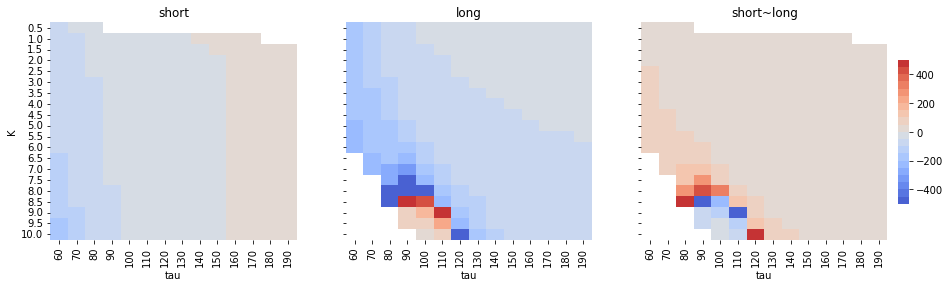

threshold 0.7
-5729.291804417044 11448.712108036589


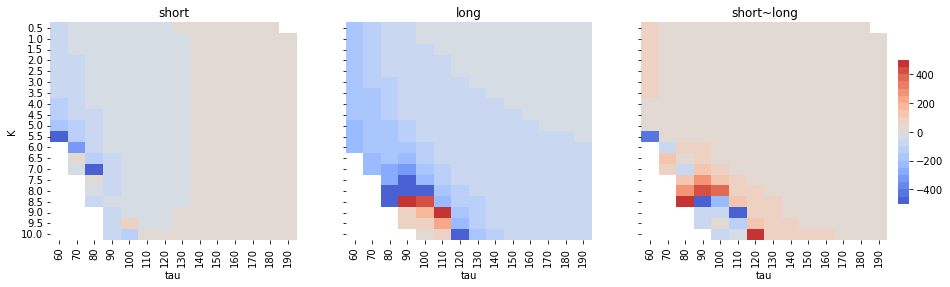

threshold 0.6
-1179.8166386541639 2014.1476755426547


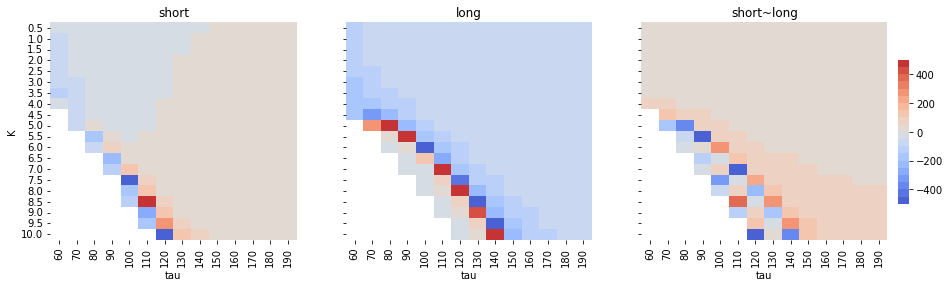

In [9]:
print('threshold', 0.8)
pt.plot_ind_point(short_ktau08, long_ktau08, K_lst, tau)
print('threshold', 0.7)
pt.plot_ind_point(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.6)
pt.plot_ind_point(short_ktau06, long_ktau06, K_lst, tau)

threshold 0.8
-0.7814186174421873 1.2234295795647423


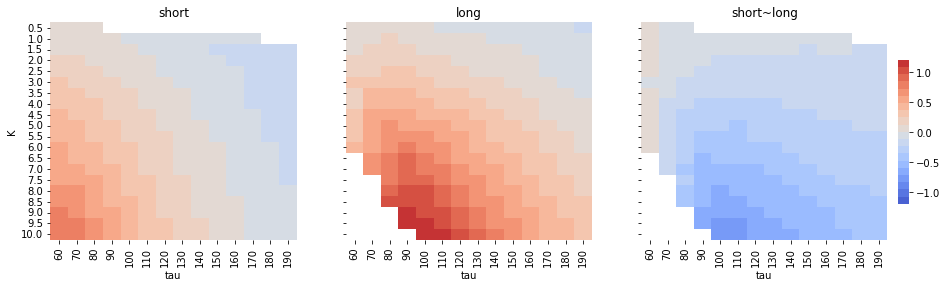

threshold 0.7
-0.3435957875864024 1.3678889865735142


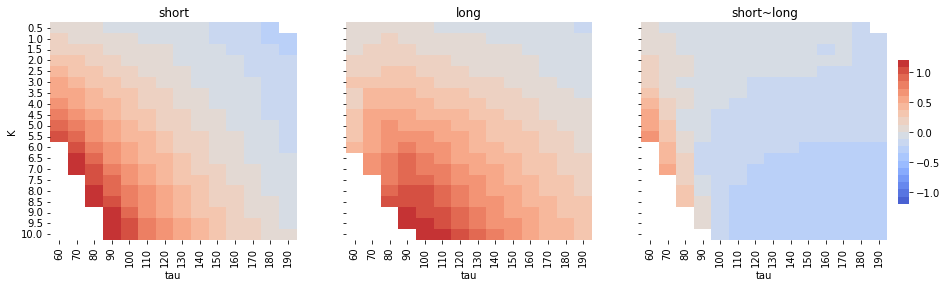

threshold 0.6
-0.5149012788129346 1.5095806267056064


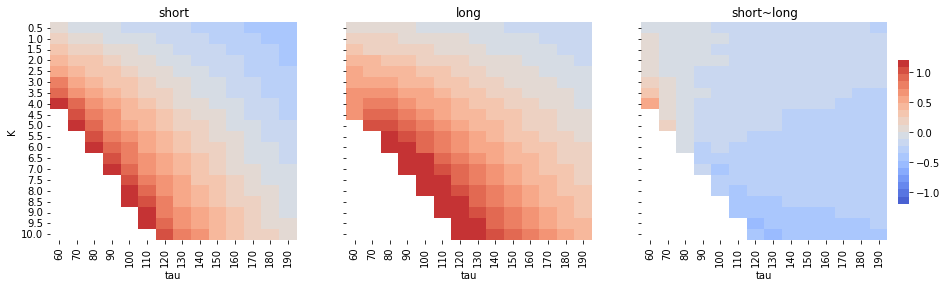

In [10]:
print('threshold', 0.8)
pt.plot_slope(short_ktau08, long_ktau08, K_lst, tau)
print('threshold', 0.7)
pt.plot_slope(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.6)
pt.plot_slope(short_ktau06, long_ktau06, K_lst, tau)

threshold 0.8
4964.417532475349 59562.64901097944


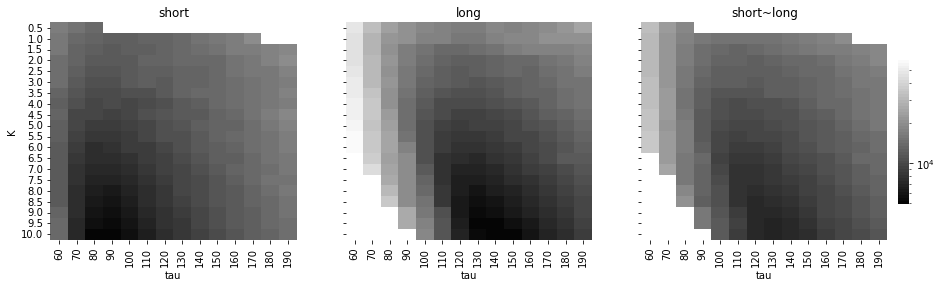

threshold 0.7
1407.9647813885788 59562.64901097944


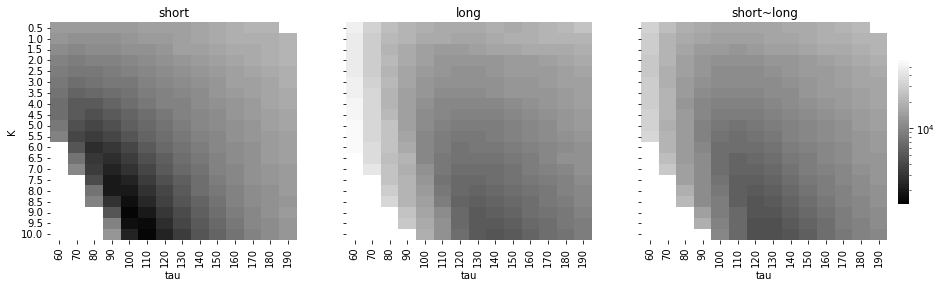

threshold 0.6
1114.8108834479006 44537.48021653736


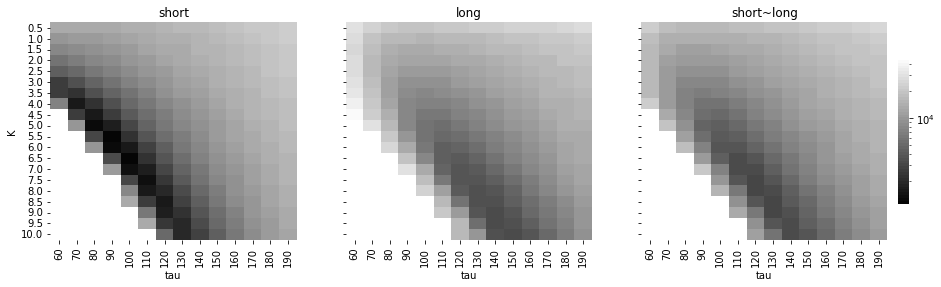

In [11]:
print('threshold', 0.8)
pt.plot_mse(short_ktau08, long_ktau08, K_lst, tau)
print('threshold', 0.7)
pt.plot_mse(short_ktau07, long_ktau07, K_lst, tau)
# 6. ,  7.5,  9. ,  8. ,  9. , 10. , 10. , 10. , 10. , 10. , 10. , 10. , 10. ,  0.5
print('threshold', 0.6)
pt.plot_mse(short_ktau06, long_ktau06, K_lst, tau)

In [13]:
print(pt.get_opt_K(short_ktau08, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau08, K_lst, tau, mse=True))

90 10.0
[(60, 8.5), (70, 10.0), (80, 10.0), (90, 10.0), (100, 10.0), (110, 10.0), (120, 10.0), (130, 10.0), (140, 10.0), (150, 10.0), (160, 10.0), (170, 9.5), (180, 10.0), (190, 10.0)]
140 10.0
[(60, 1.0), (70, 1.5), (80, 3.5), (90, 4.0), (100, 6.5), (110, 7.5), (120, 8.5), (130, 9.5), (140, 10.0), (150, 10.0), (160, 10.0), (170, 10.0), (180, 10.0), (190, 10.0)]


In [110]:
print(pt.get_opt_K(short_ktau07, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau07, K_lst, tau, mse=True))

[(60, 4.5), (70, 5.5), (80, 6.0), (90, 8.0), (100, 9.0), (110, 10.0), (120, 10.0), (130, 10.0), (140, 10.0), (150, 10.0), (160, 10.0), (170, 10.0), (180, 10.0), (190, 10.0)]
[(60, 1.0), (70, 1.5), (80, 3.5), (90, 4.0), (100, 6.5), (110, 7.5), (120, 8.5), (130, 9.5), (140, 10.0), (150, 10.0), (160, 10.0), (170, 10.0), (180, 10.0), (190, 10.0)]


In [111]:
print(pt.get_opt_K(short_ktau06, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau06, K_lst, tau, mse=True))

[(60, 3.5), (70, 4.0), (80, 5.0), (90, 5.5), (100, 6.5), (110, 7.5), (120, 8.5), (130, 10.0), (140, 10.0), (150, 10.0), (160, 10.0), (170, 10.0), (180, 10.0), (190, 10.0)]
[(60, 1.5), (70, 2.0), (80, 3.5), (90, 5.0), (100, 5.5), (110, 6.0), (120, 7.0), (130, 8.5), (140, 9.5), (150, 10.0), (160, 10.0), (170, 10.0), (180, 10.0), (190, 10.0)]


0.9214596239907958
0.7074449166484242


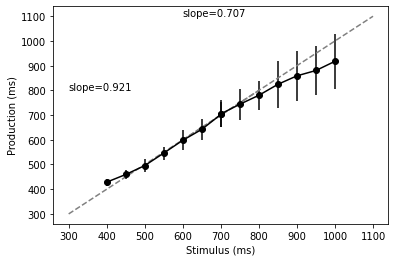

In [139]:
params = Params(ntrials=500, delay=700, tau=100, sigma=0.01, th=0.7)
expsim = ExperimentSimulation(params)

K = 9
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 6.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

threshold 0.8


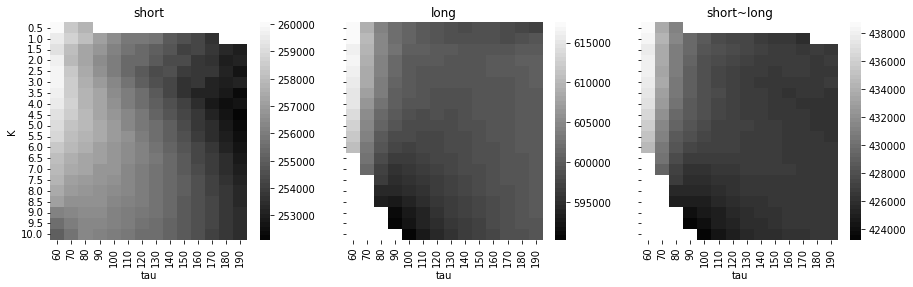

threshold 0.7


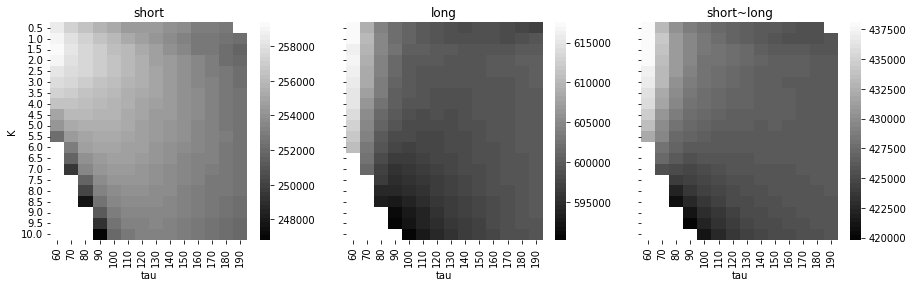

threshold 0.6


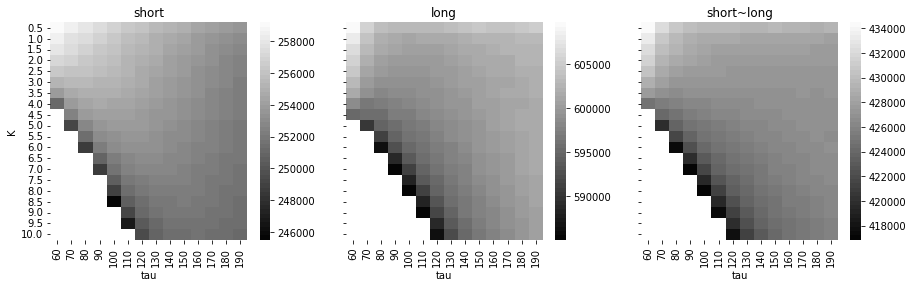

In [33]:
print('threshold', 0.8)
pt.plot_mse_total(short_ktau08, long_ktau08, K_lst, tau)
print('threshold', 0.7)
pt.plot_mse_total(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.6)
pt.plot_mse_total(short_ktau06, long_ktau06, K_lst, tau)

# Parameter Space (K 8-18, sigma = 0.01)

In [120]:
K_lst = np.arange(8, 18, 0.5)
th_lst = np.arange(0.6, 0.75, 0.01)
delay_lst = np.arange(400, 1000, 50)
tau = np.arange(60, 200, 10)

print(len(K_lst), len(th_lst), len(delay_lst), len(tau))

20 16 12 14


In [121]:
path = '../results/'
short_ktau08, long_ktau08 = pt.load_data(path+'SHORT_K8-18TAU_th08_del700-20220607-095036-output.pickle', 
                                      path+'LONG_K8-18TAU_th08_del700-20220603-163420-output.pickle')
short_ktau07, long_ktau07 = pt.load_data(path+'SHORT_K8-18TAU_th07_del700-20220603-164917-output.pickle', 
                                      path+'LONG_K8-18TAU_th07_del700-20220603-170257-output.pickle')
short_ktau06, long_ktau06 = pt.load_data(path+'SHORT_K8-18TAU_th06_del700-20220603-171654-output.pickle',
                                      path+'LONG_K8-18TAU_th06_del700-20220603-172926-output.pickle')

threshold 0.8
-3811.264553848741 6022.062763663883


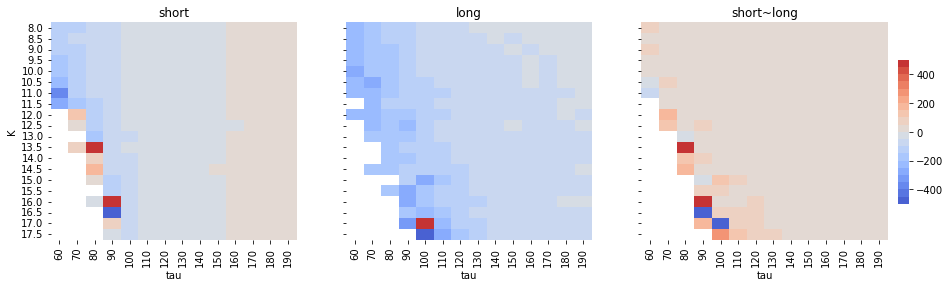

threshold 0.7
-28799.425898618334 18892.970195755333


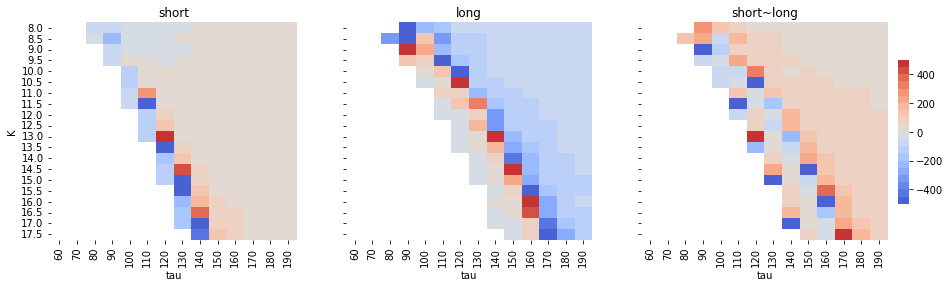

threshold 0.6
-119425.63505011542 238889.22889246762


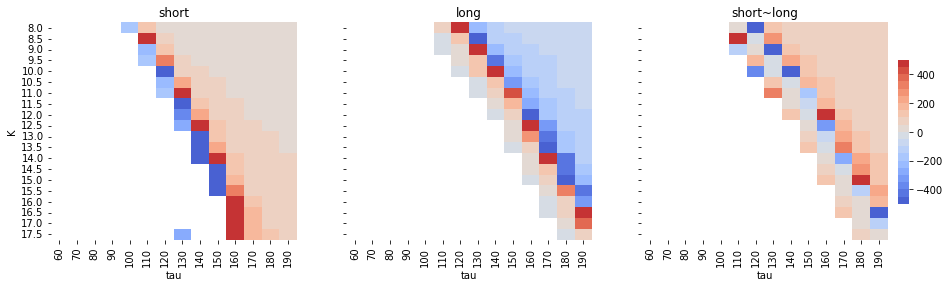

In [22]:
print('threshold', 0.8)
pt.plot_ind_point(short_ktau08, long_ktau08, K_lst, tau)
print('threshold', 0.7)
pt.plot_ind_point(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.6)
pt.plot_ind_point(short_ktau06, long_ktau06, K_lst, tau)

threshold 0.8
-0.3755203962604212 1.2074507730345503


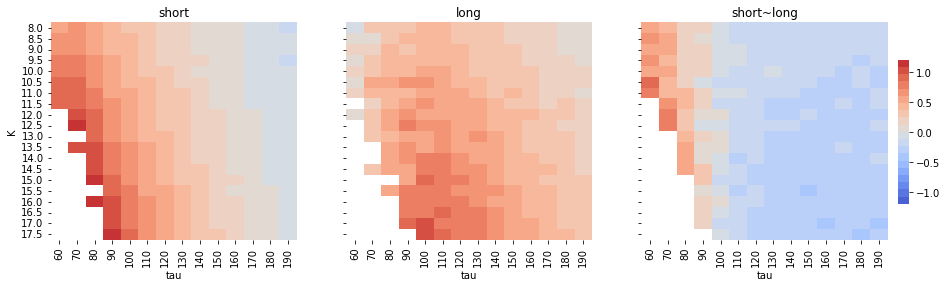

threshold 0.7
-0.6154258883643037 1.534901314080837


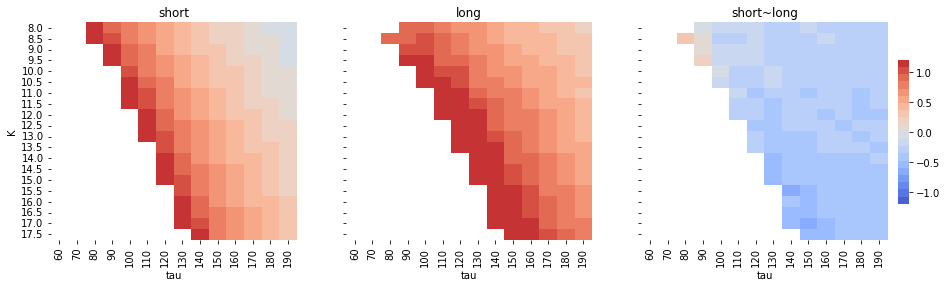

threshold 0.6
-0.8120747286787428 1.5622141012290096


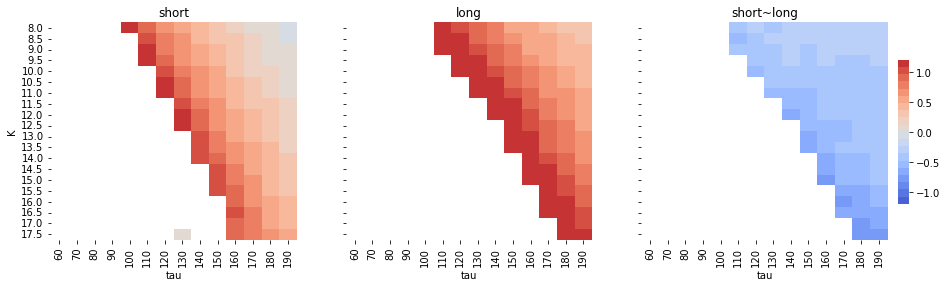

In [23]:
print('threshold', 0.8)
pt.plot_slope(short_ktau08, long_ktau08, K_lst, tau)
print('threshold', 0.7)
pt.plot_slope(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.6)
pt.plot_slope(short_ktau06, long_ktau06, K_lst, tau)

threshold 0.8
2620.861148924095 100411.98825586514


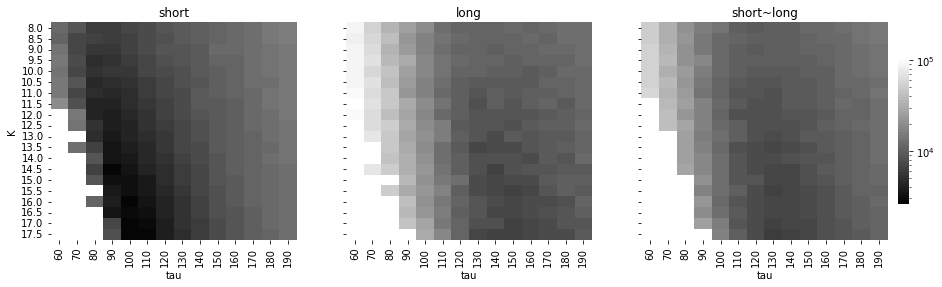

threshold 0.7
1043.8246370950092 38528.138632468246


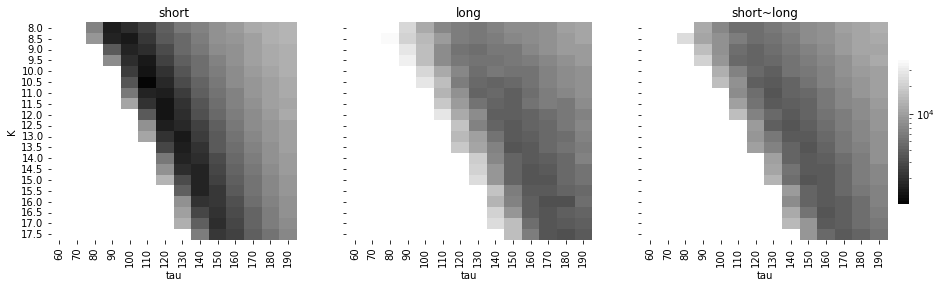

threshold 0.6
1635.276566884289 84677.90521181177


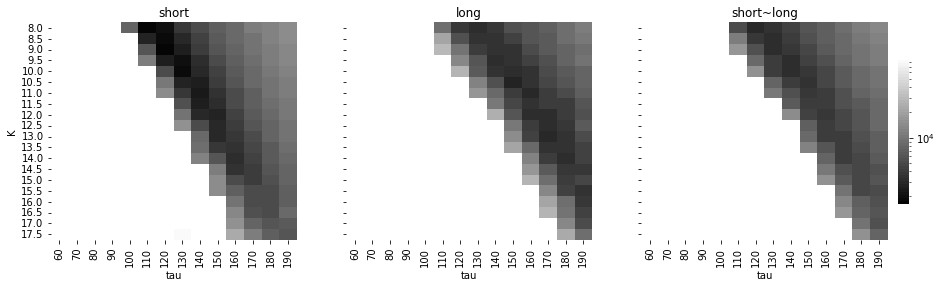

In [24]:
print('threshold', 0.8)
pt.plot_mse(short_ktau08, long_ktau08, K_lst, tau)
print('threshold', 0.7)
pt.plot_mse(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.6)
pt.plot_mse(short_ktau06, long_ktau06, K_lst, tau)

In [126]:
print(pt.get_opt_K(short_ktau08, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau08, K_lst, tau, mse=True))

[(60, 8.5), (70, 9.0), (80, 12.0), (90, 14.5), (100, 17.0), (110, 17.5), (120, 17.5), (130, 17.5), (140, 17.5), (150, 17.5), (160, 17.5), (170, 17.5), (180, 17.5), (190, 17.5)]
[(60, 8.5), (70, 8.0), (80, 9.0), (90, 8.5), (100, 8.5), (110, 12.0), (120, 12.5), (130, 13.5), (140, 14.5), (150, 17.0), (160, 17.0), (170, 17.5), (180, 17.5), (190, 17.0)]


In [129]:
print(pt.get_opt_K(short_ktau07, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau07, K_lst, tau, mse=True))

[(60, 8.0), (70, 8.0), (80, 8.0), (90, 8.0), (100, 8.5), (110, 10.5), (120, 12.0), (130, 13.0), (140, 15.0), (150, 17.0), (160, 17.5), (170, 17.5), (180, 17.5), (190, 17.5)]
[(60, 8.0), (70, 8.0), (80, 8.5), (90, 8.5), (100, 8.0), (110, 8.0), (120, 9.0), (130, 11.0), (140, 12.0), (150, 13.5), (160, 15.0), (170, 16.0), (180, 16.0), (190, 17.5)]


In [130]:
print(pt.get_opt_K(short_ktau06, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau06, K_lst, tau, mse=True))

[(60, 8.0), (70, 8.0), (80, 8.0), (90, 8.0), (100, 8.0), (110, 8.0), (120, 9.0), (130, 10.0), (140, 11.0), (150, 12.0), (160, 14.0), (170, 14.5), (180, 16.5), (190, 17.5)]
[(60, 8.0), (70, 8.0), (80, 8.0), (90, 8.0), (100, 8.0), (110, 8.0), (120, 8.0), (130, 8.0), (140, 9.5), (150, 10.5), (160, 11.0), (170, 13.0), (180, 14.0), (190, 15.5)]


threshold 0.8
250690.427402863 629500.1049250535


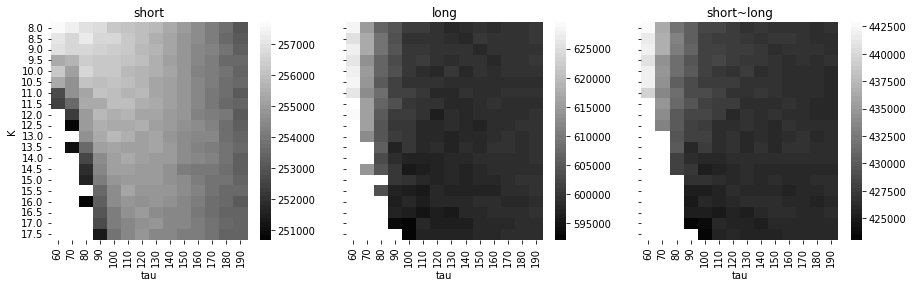

threshold 0.7
246617.61054766734 600052.644


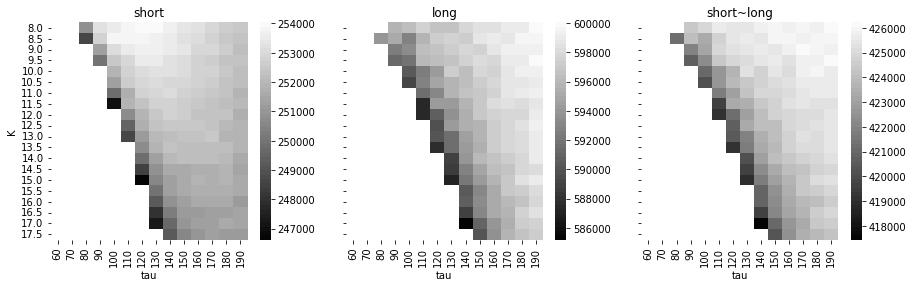

threshold 0.6
245038.1 601309.972


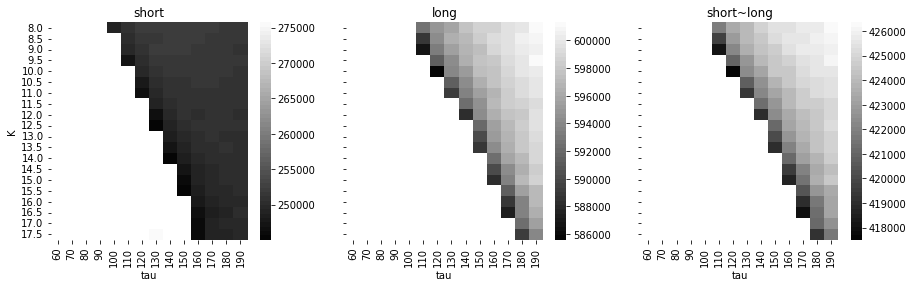

In [25]:
print('threshold', 0.8)
pt.plot_mse_total(short_ktau08, long_ktau08, K_lst, tau)
print('threshold', 0.7)
pt.plot_mse_total(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.6)
pt.plot_mse_total(short_ktau06, long_ktau06, K_lst, tau)

# Parameter Space (K 2-20, sigma = 0.01)

In [164]:
K_lst = np.arange(1, 22, 1)
th_lst = np.arange(0.6, 0.75, 0.01)
delay_lst = np.arange(400, 1000, 50)
tau = np.arange(60, 200, 10)

print(len(K_lst), len(th_lst), len(delay_lst), len(tau))

21 16 12 14


In [165]:
path = '../results/'
short_ktau09, long_ktau09 = pt.load_data(path+'SHORT_K1-21TAU_th09_del700-20220607-122526-output.pickle',
                                      path+'LONG_K1-21TAU_th09_del700-20220607-123614-output.pickle')
short_ktau08, long_ktau08 = pt.load_data(path+'SHORT_K1-21TAU_th08_del700-20220607-110703-output.pickle', 
                                      path+'LONG_K1-21TAU_th08_del700-20220607-114054-output.pickle')
short_ktau07, long_ktau07 = pt.load_data(path+'SHORT_K1-21TAU_th07_del700-20220607-120324-output.pickle', 
                                      path+'LONG_K1-21TAU_th07_del700-20220607-115320-output.pickle')

threshold 0.8
-58739.40899281486 58684.854851095


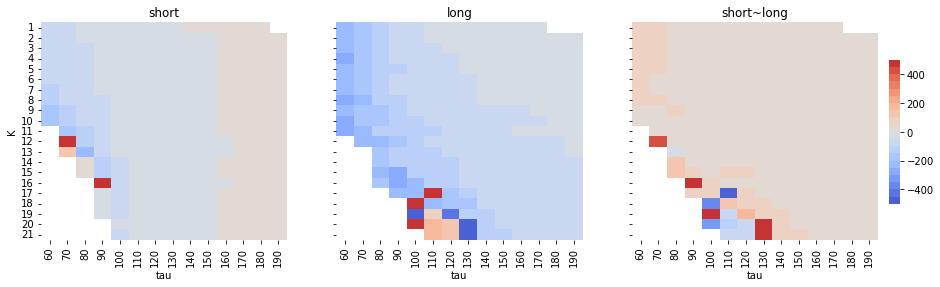

threshold 0.7
-10083.090086375834 20208.214105972376


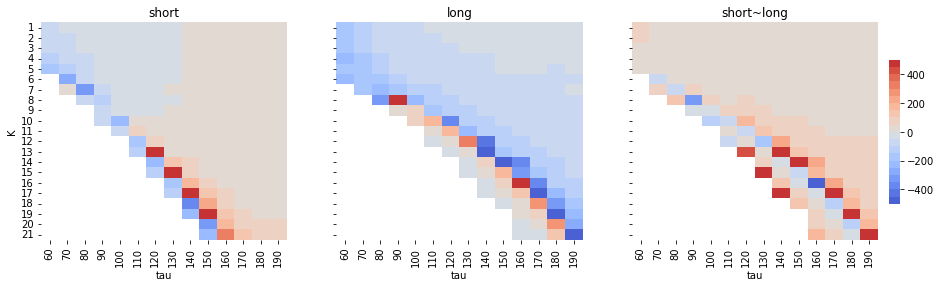

In [40]:
print('threshold', 0.8)
pt.plot_ind_point(short_ktau08, long_ktau08, K_lst, tau)
print('threshold', 0.7)
pt.plot_ind_point(short_ktau07, long_ktau07, K_lst, tau)

threshold 0.8
-0.4716899756050298 1.229320858524066


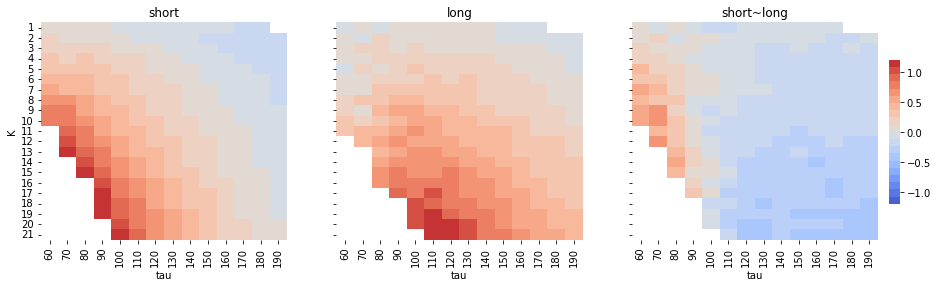

threshold 0.7
-0.6897718896281438 1.591016080186787


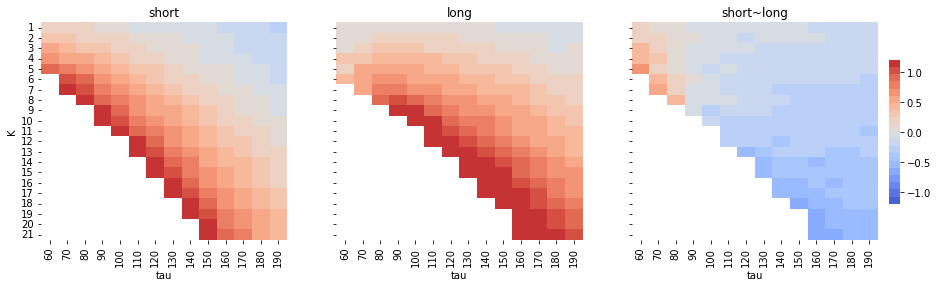

In [39]:
print('threshold', 0.8)
pt.plot_slope(short_ktau08, long_ktau08, K_lst, tau)
print('threshold', 0.7)
pt.plot_slope(short_ktau07, long_ktau07, K_lst, tau)

threshold 0.9
threshold 0.8
2337.9751299520467 97161.48265474546


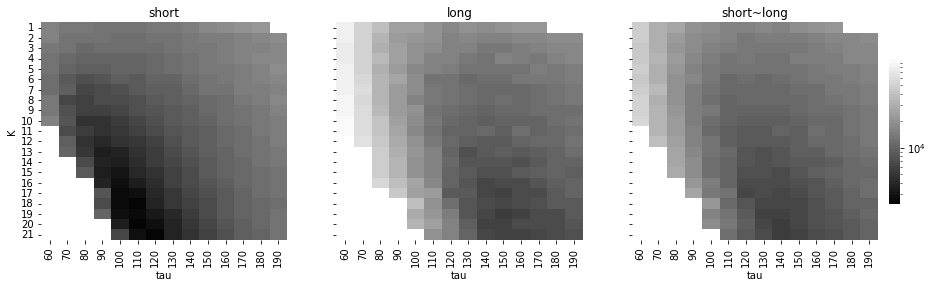

threshold 0.7
1335.3527717600211 69758.0248023876


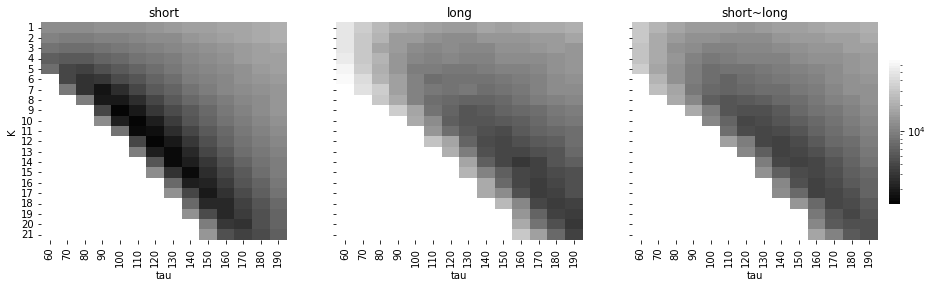

In [37]:
print('threshold', 0.9)
#plot_mse(short_ktau09, long_ktau09, K_lst, tau)
print('threshold', 0.8)
pt.plot_mse(short_ktau08, long_ktau08, K_lst, tau)
print('threshold', 0.7)
pt.plot_mse(short_ktau07, long_ktau07, K_lst, tau)

In [166]:
print(pt.get_opt_K(short_ktau08, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau08, K_lst, tau, mse=True))

110 20
[(60, 6), (70, 8), (80, 12), (90, 13), (100, 17), (110, 20), (120, 21), (130, 20), (140, 21), (150, 21), (160, 21), (170, 20), (180, 21), (190, 18)]
150 19
[(60, 4), (70, 1), (80, 3), (90, 5), (100, 8), (110, 11), (120, 17), (130, 13), (140, 20), (150, 19), (160, 21), (170, 21), (180, 21), (190, 21)]


In [167]:
print(pt.get_opt_K(short_ktau07, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau07, K_lst, tau, mse=True))

100 9
[(60, 4), (70, 5), (80, 6), (90, 7), (100, 9), (110, 10), (120, 12), (130, 14), (140, 15), (150, 17), (160, 19), (170, 20), (180, 21), (190, 21)]
190 20
[(60, 2), (70, 2), (80, 3), (90, 4), (100, 5), (110, 8), (120, 10), (130, 10), (140, 12), (150, 13), (160, 14), (170, 16), (180, 18), (190, 20)]


0.796873644008621
0.8893416997180238


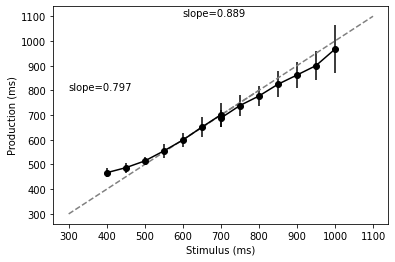

In [169]:
params = Params(ntrials=500, delay=700, tau=140, sigma=0.01, th=0.7)
expsim = ExperimentSimulation(params)

K = 15
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)


params = Params(ntrials=500, delay=700, tau=140, sigma=0.01, th=0.7)
expsim = ExperimentSimulation(params)
K = 12
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

0.8016192053565744
0.5405185909424125


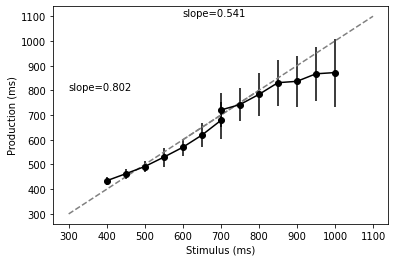

In [149]:
params = Params(ntrials=500, delay=700, tau=110, sigma=0.01, th=0.8)
expsim = ExperimentSimulation(params)

K = 20
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 11
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

threshold 0.9
threshold 0.8
907.5529454865442 51833.609020658834


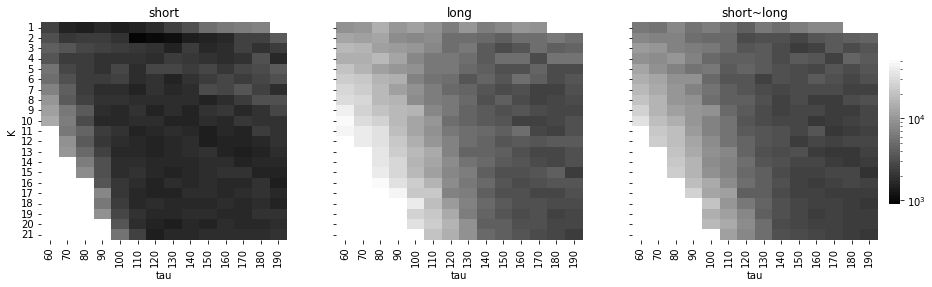

threshold 0.7
743.4996184250724 47925.568655758434


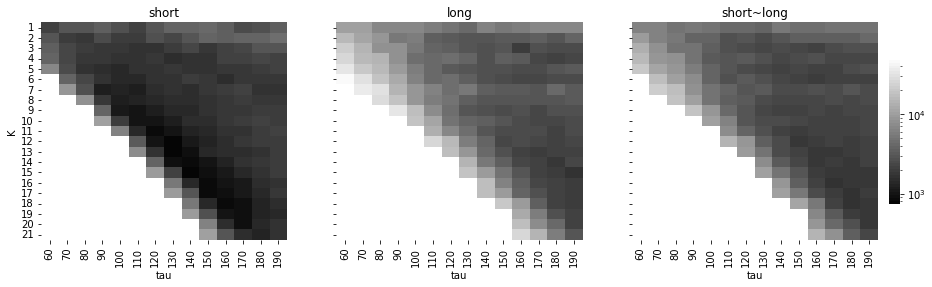

In [145]:
print('threshold', 0.9)
#pt.plot_mse(short_ktau09, long_ktau09)
print('threshold', 0.8)
pt.plot_mse(short_ktau08, long_ktau08, K_lst, tau, 'var')
print('threshold', 0.7)
pt.plot_mse(short_ktau07, long_ktau07, K_lst, tau, 'var')

threshold 0.8
248719.20328542095 631235.3029045643


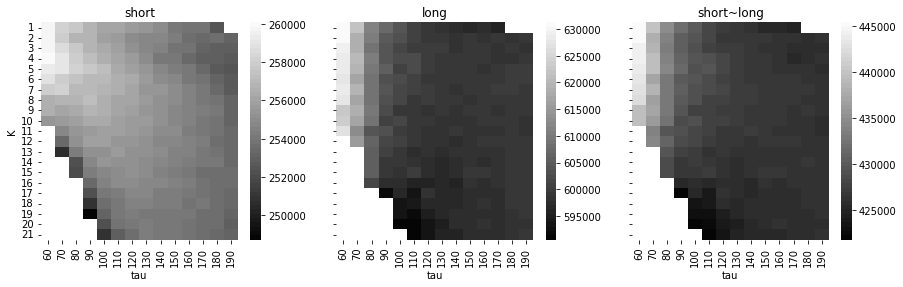

threshold 0.7
245205.48163265307 619965.9034205232


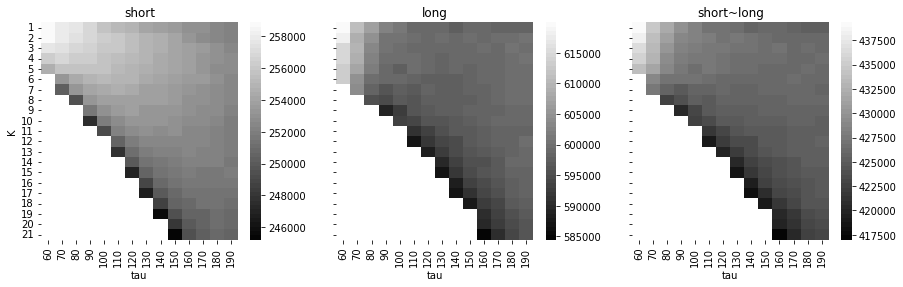

In [38]:
print('threshold', 0.8)
pt.plot_mse_total(short_ktau08, long_ktau08, K_lst, tau)
print('threshold', 0.7)
pt.plot_mse_total(short_ktau07, long_ktau07, K_lst, tau)

# Parameter Space (K 1-15, sigma = 0.02)

In [125]:
K_lst = np.arange(1, 15.5, 0.5)
tau = np.arange(90, 120, 5)

print(len(K_lst), len(tau))

29 6


In [126]:
path = '../results/'
short_ktau065, long_ktau065 = pt.load_data(path+'SHORT_K1-15TAU_th065_del700_sig02_fix_seed-20220620-111152-output.pickle',
                                      path+'LONG_K1-15TAU_th065_del700_sig02_fix_seed-20220620-105438-output.pickle')
short_ktau07, long_ktau07 = pt.load_data(path+'SHORT_K1-15TAU_th07_del700_sig02_fix_seed-20220620-154906-output.pickle', 
                                      path+'LONG_K1-15TAU_th07_del700_sig02_fix_seed-20220620-104646-output.pickle')
short_ktau075, long_ktau075 = pt.load_data(path+'SHORT_K1-15TAU_th075_del700_sig02_fix_seed-20220617-182536-output.pickle', 
                                      path+'LONG_K1-15TAU_th075_del700_sig02_fix_seed-20220617-181956-output.pickle')

threshold 0.75
-18132.02694877189 9070.892965574652


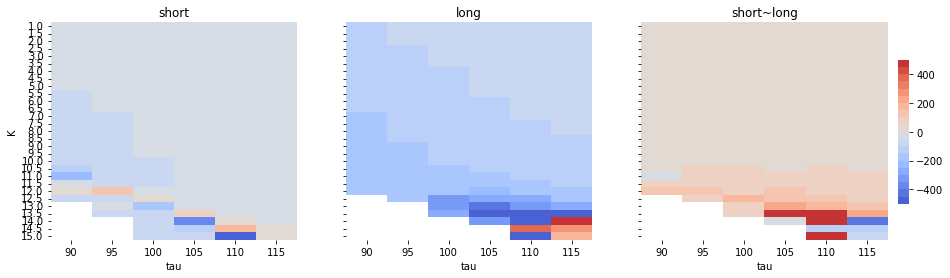

threshold 0.7
-10162.04339586104 8070.409358782717


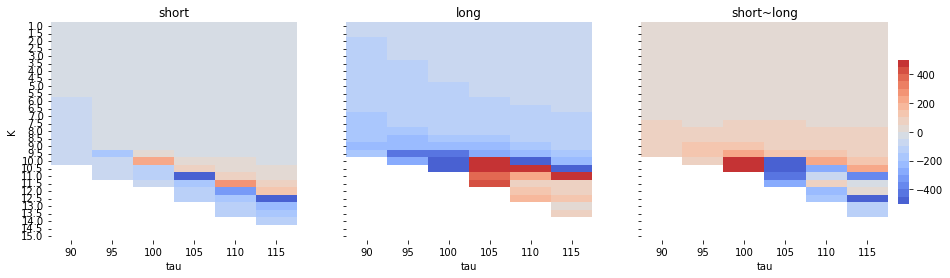

threshold 0.65
-3336.9734131358373 6709.157810712808


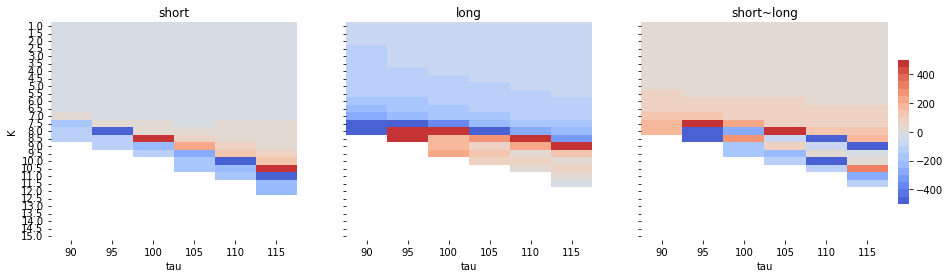

In [33]:
print('threshold', 0.75)
pt.plot_ind_point(short_ktau075, long_ktau075, K_lst, tau)
print('threshold', 0.7)
pt.plot_ind_point(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.65)
pt.plot_ind_point(short_ktau065, long_ktau065, K_lst, tau)

threshold 0.75
-0.20545655014571984 1.20963144485069


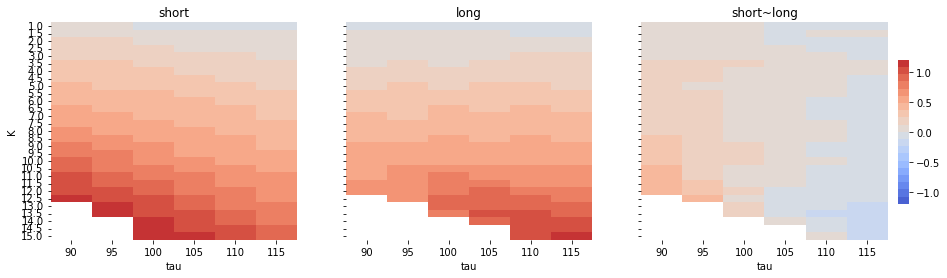

threshold 0.7
-0.26277151550490485 1.23945346640628


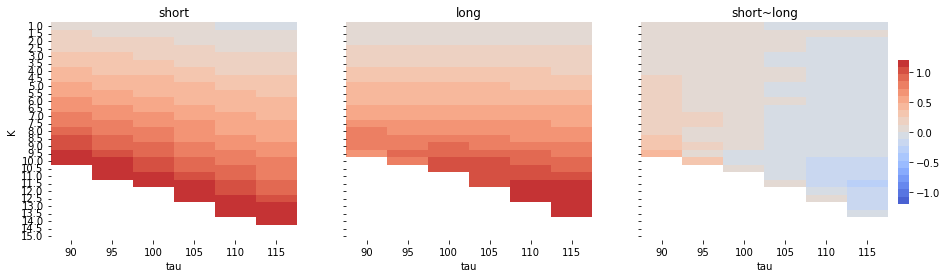

threshold 0.65
-0.3049433241391152 1.2643972552367302


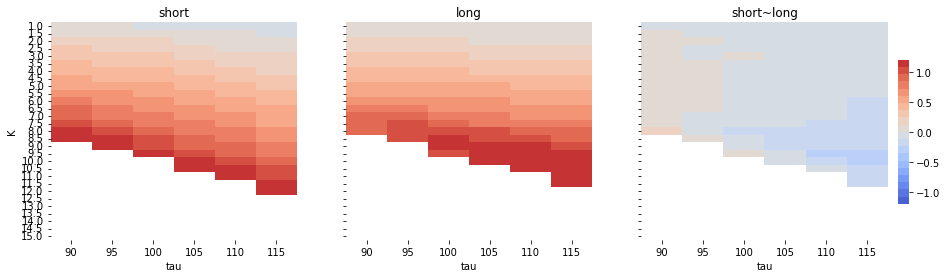

In [34]:
print('threshold', 0.75)
pt.plot_slope(short_ktau075, long_ktau075, K_lst, tau)
print('threshold', 0.7)
pt.plot_slope(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.65)
pt.plot_slope(short_ktau065, long_ktau065, K_lst, tau)

threshold 0.75
3802.614633371331 59755.158085831594


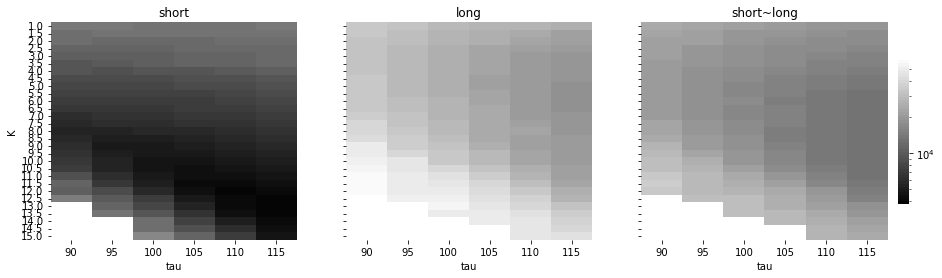

threshold 0.7
3398.823432167041 52449.643266101586


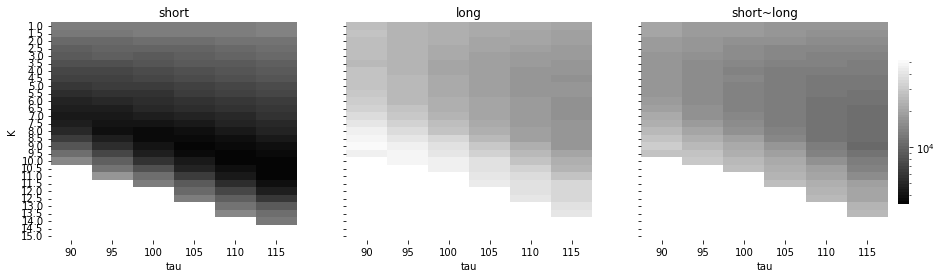

threshold 0.65
3159.083195703433 44843.63695619057


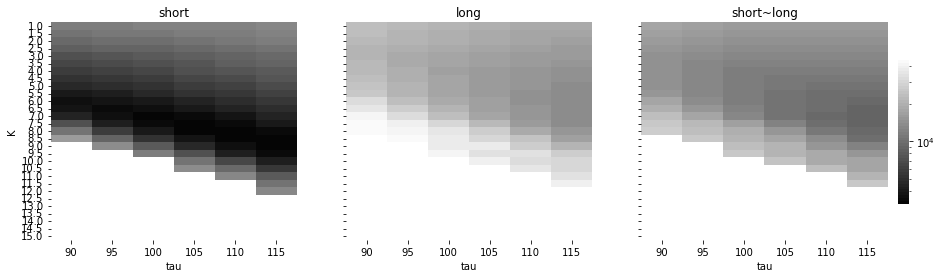

In [127]:
print('threshold', 0.75)
pt.plot_mse(short_ktau075, long_ktau075, K_lst, tau)
print('threshold', 0.7)
pt.plot_mse(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.65)
pt.plot_mse(short_ktau065, long_ktau065, K_lst, tau)

In [159]:
print(pt.get_opt_K(short_ktau065, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau065, K_lst, tau, mse=True))

115 8.5
[(90, 6.0), (95, 6.5), (100, 7.0), (105, 7.5), (110, 8.0), (115, 8.5)]
115 6.5
[(90, 2.5), (95, 3.0), (100, 4.0), (105, 5.0), (110, 5.5), (115, 6.5)]


0.7207712939099097
0.6638570520612902


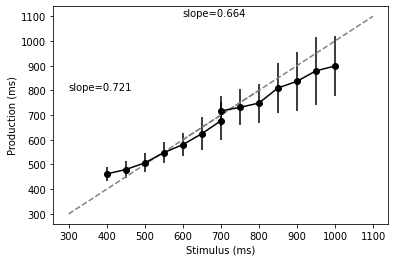

In [163]:
params = Params(ntrials=500, delay=700, tau=115, sigma=0.02, th=0.65)
expsim = ExperimentSimulation(params)

K = 8.5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 6.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

0.7932128647733078
0.5579390222064682


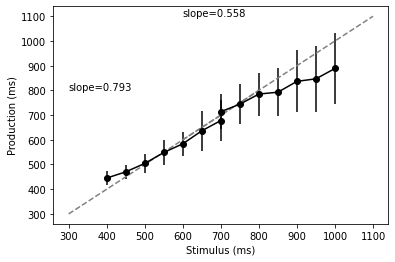

In [48]:
params = Params(ntrials=500, delay=700, tau=105, sigma=0.02, th=0.65)
expsim = ExperimentSimulation(params)

K = 7.5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

0.6992176168652484
0.5248620951425118


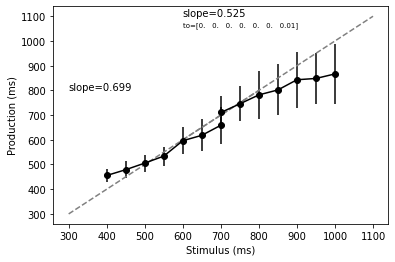

In [50]:
params = Params(ntrials=500, delay=700, tau=110, sigma=0.02, th=0.65)
expsim = ExperimentSimulation(params)

K = 8
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 5.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

In [160]:
print(pt.get_opt_K(short_ktau07, mse=True))
print(pt.get_opt_K(long_ktau07, mse=True))

115 10.5
[(90, 7.0), (95, 8.0), (100, 8.5), (105, 9.0), (110, 9.5), (115, 10.5)]
115 6.0
[(90, 3.5), (95, 3.5), (100, 4.0), (105, 4.0), (110, 4.5), (115, 6.0)]


0.742354007515197
0.33845448488122937


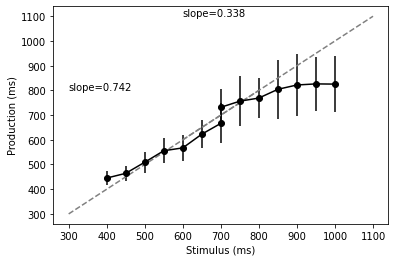

In [55]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=110, sigma=0.02, th=0.7)
expsim = ExperimentSimulation(params)

K = 9.5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 4.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

0.7713627659035325
0.4270743505179019


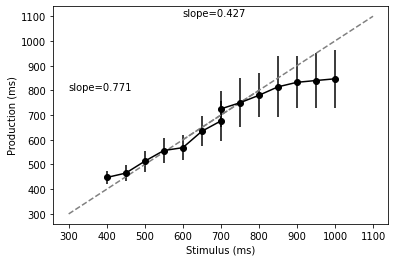

In [83]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=115, sigma=0.02, th=0.7)
expsim = ExperimentSimulation(params)

K = 10.5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 6
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

In [161]:
print(pt.get_opt_K(short_ktau075, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau075, K_lst, tau, mse=True))

115 13.0
[(90, 8.0), (95, 9.0), (100, 10.5), (105, 11.5), (110, 12.0), (115, 13.0)]
115 5.5
[(90, 2.5), (95, 3.0), (100, 5.0), (105, 5.0), (110, 5.5), (115, 5.5)]


0.7356304804830808
0.2940190552069673


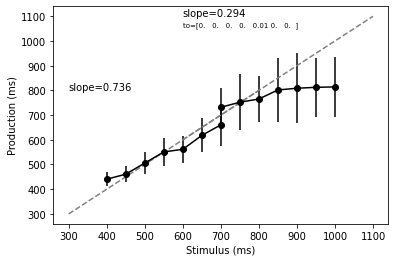

In [88]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=110, sigma=0.02, th=0.75)
expsim = ExperimentSimulation(params)

K = 12
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 5.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

threshold 0.65
1492.595288046945 43458.79688756483


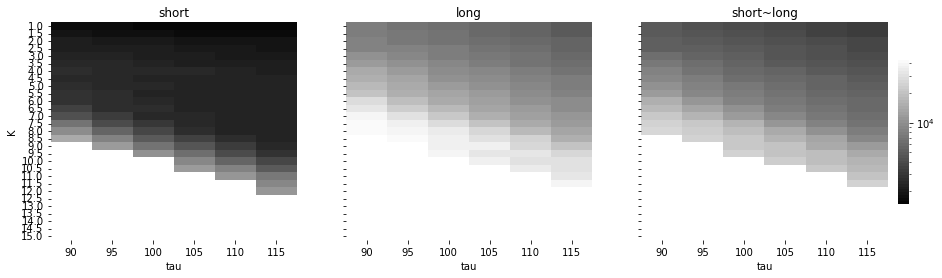

threshold 0.7
2307.5399605044295 49045.967481187115


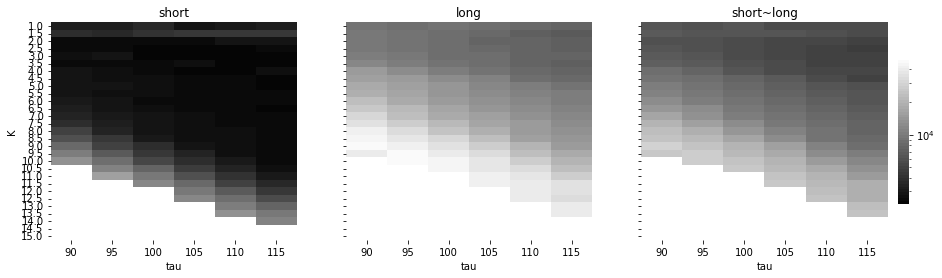

threshold 0.75
2002.154459272536 52970.51215046338


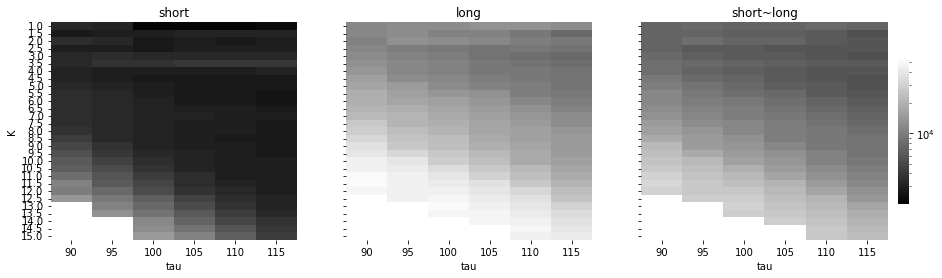

In [89]:
print('threshold', 0.65)
pt.plot_mse(short_ktau065, long_ktau065, K_lst, tau, 'var')
print('threshold', 0.7)
pt.plot_mse(short_ktau07, long_ktau07, K_lst, tau, 'var')
print('threshold', 0.75)
pt.plot_mse(short_ktau075, long_ktau075, K_lst, tau, 'var')

threshold 0.65
246297.95071868584 606220.02


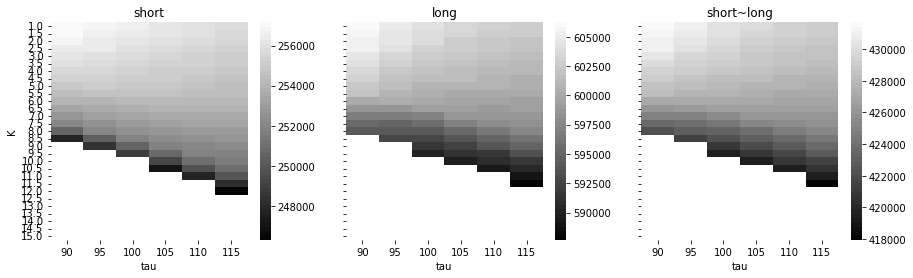

threshold 0.7
246776.39835728952 607966.0423387097


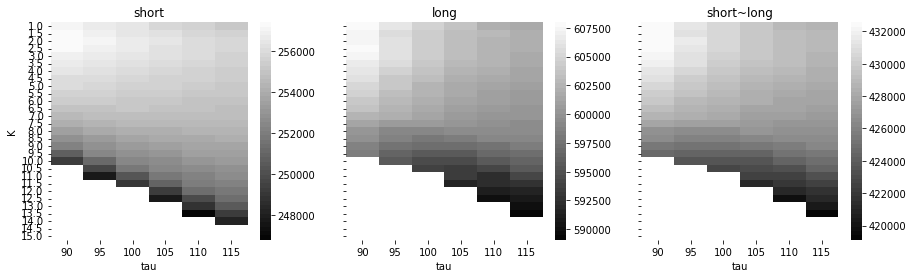

threshold 0.75
248691.30816326532 610799.9596774194


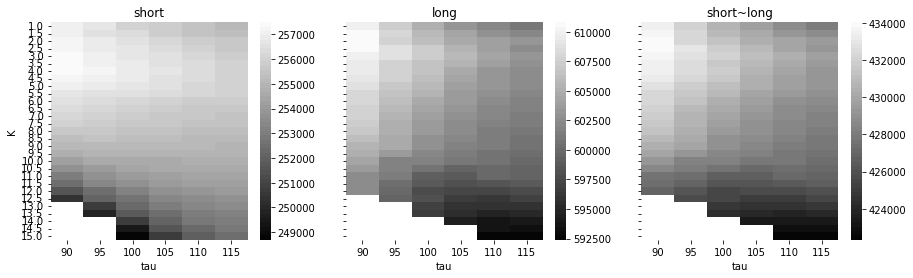

In [43]:
print('threshold', 0.65)
pt.plot_mse_total(short_ktau065, long_ktau065, K_lst, tau)
print('threshold', 0.7)
pt.plot_mse_total(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.75)
pt.plot_mse_total(short_ktau075, long_ktau075, K_lst, tau)

## Seed influence

In [90]:
K_lst = np.arange(1, 15.5, 0.5)
tau = [0,1,2,3,4,5,6,7]
print(len(K_lst), len(tau))

29 8


In [91]:
path = '../results/'
short_ktau07, long_ktau07 = pt.load_data(path+'SHORT_K1-15_TAU110_th07_del700_sig02_seedlst-20220623-143041-output.pickle', 
                                      path+'LONG_K1-15_TAU110_th07_del700_sig02_seedlst-20220623-144516-output.pickle')

threshold 0.7
-0.24742205914299642 1.2984057821500887


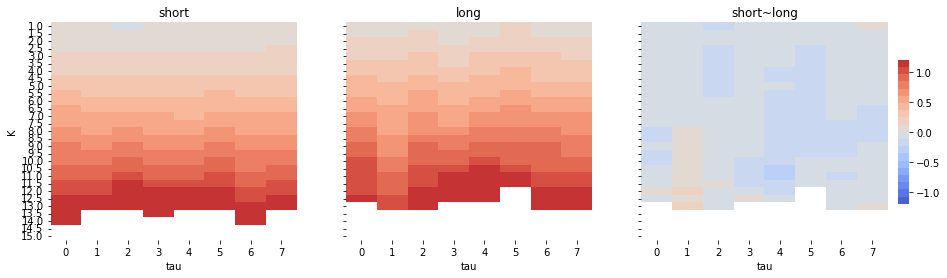

In [93]:
print('threshold', 0.7)
pt.plot_slope(short_ktau07, long_ktau07, K_lst, tau)

3276.833060652472 51543.80512764101


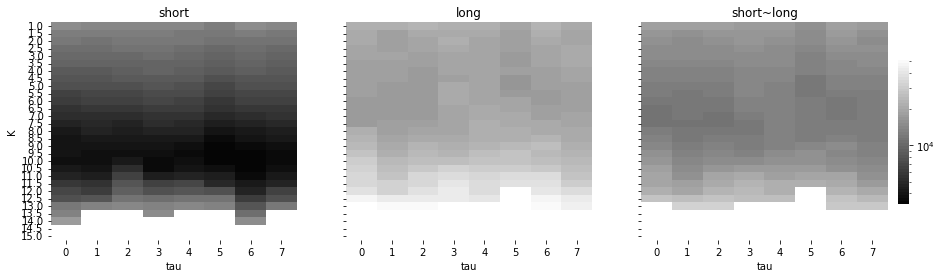

In [94]:
pt.plot_mse(short_ktau07, long_ktau07, K_lst, tau)

In [118]:
print(list(zip(*get_opt_K(short_ktau07, K_lst, tau, mse=True)))[1])
print(list(zip(*get_opt_K(long_ktau07, K_lst, tau, mse=True)))[1])

(10.0, 9.5, 9.5, 10.0, 9.5, 9.5, 10.0, 10.0)
(7.0, 5.0, 5.0, 4.5, 5.0, 4.5, 5.5, 6.0)


In [115]:
np.mean(list(zip(*get_opt_K(short_ktau07, mse=True)))[1]), np.std(list(zip(*get_opt_K(short_ktau07, mse=True)))[1])

(9.75, 0.25)

In [116]:
np.mean(list(zip(*get_opt_K(long_ktau07, mse=True)))[1]), np.std(list(zip(*get_opt_K(long_ktau07, mse=True)))[1])

(5.3125, 0.7880950133074057)

0.7951718712432998
0.4780127113338658


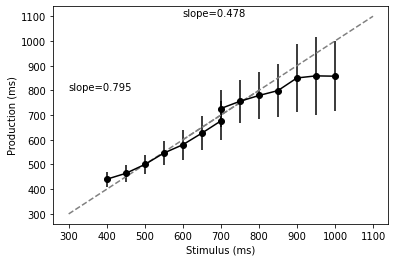

In [123]:
np.random.seed()
params = Params(ntrials=500, delay=700, tau=110, sigma=0.02, th=0.7)
expsim = ExperimentSimulation(params)

K = 9.75
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 5.31
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

## Optimized

0.8034037266071195
0.40273043511423995


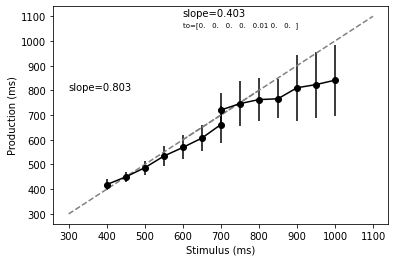

In [182]:
params = Params(ntrials=500, delay=700, tau=80, sigma=0.01, th=0.7)
expsim = ExperimentSimulation(params)

K = 6
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 3.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

0.7764425015831803
0.3517041916030438


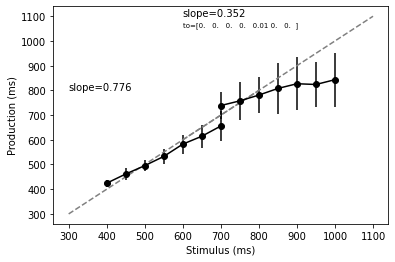

In [165]:
params = Params(ntrials=500, delay=700, tau=90, sigma=0.01, th=0.7)
expsim = ExperimentSimulation(params)

K = 7
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 4
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

0.8386537492256182
0.46835823846515534


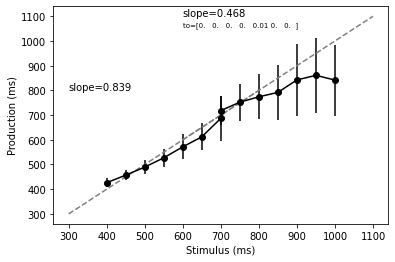

In [169]:
params = Params(ntrials=500, delay=700, tau=100, sigma=0.01, th=0.8)
expsim = ExperimentSimulation(params)

K = 17
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 8.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

0.8192410854963001
0.6891346873115233


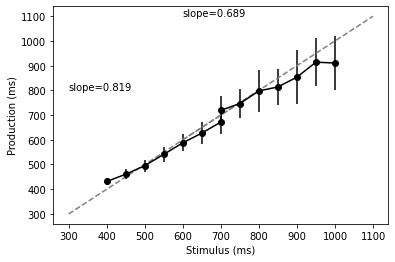

In [172]:
params = Params(ntrials=500, delay=700, tau=100, sigma=0.01, th=0.7)
expsim = ExperimentSimulation(params)

K = 8.5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 6
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

0.8024221093868587
0.5467100095032136


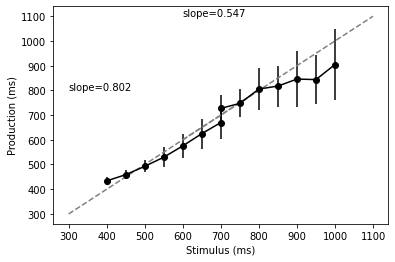

In [174]:
params = Params(ntrials=500, delay=700, tau=110, sigma=0.01, th=0.8)
expsim = ExperimentSimulation(params)

K = 20
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 11
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

0.8005142019666446
0.7966471863822979


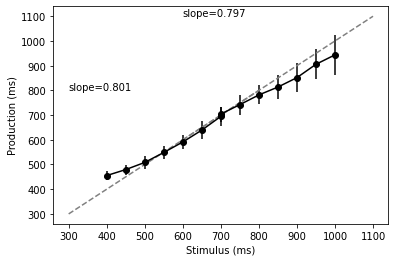

In [177]:
params = Params(ntrials=500, delay=700, tau=110, sigma=0.01, th=0.6)
expsim = ExperimentSimulation(params)

K = 7.5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 6
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

0.7305985478919332
0.8279301905571541


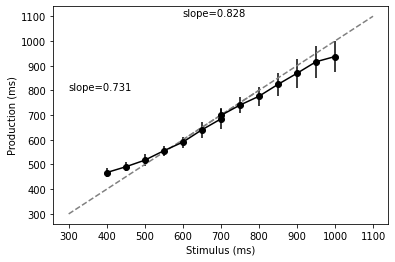

In [179]:
params = Params(ntrials=500, delay=700, tau=120, sigma=0.01, th=0.6)
expsim = ExperimentSimulation(params)

K = 8.5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 7
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

0.6960426868566295
0.9697915006190487


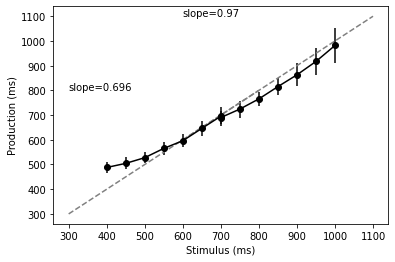

In [184]:
params = Params(ntrials=500, delay=700, tau=140, sigma=0.01, th=0.6)
expsim = ExperimentSimulation(params)

K = 11
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 9.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

# Variability of eperiments

In [11]:
def extract(short, long):
    slope_short, slope_long, ind_short, ind_long, mse_short, mse_long = [], [], [], [], [], []
    for i in range(len(short)):
        slope_short.append(short[i]['slope'])
        slope_long.append(long[i]['slope'])
        ind_short.append(short[i]['ind_point'])
        ind_long.append(long[i]['ind_point'])
        mse_short.append(short[i]['bias2']+short[i]['var'])
        mse_long.append(long[i]['bias2']+long[i]['var'])
    return slope_short, slope_long, ind_short, ind_long, mse_short, mse_long

In [16]:
short_stat, long_stat = load_data('../results/SHORT_SAME_K8_TAU100_TH08_DEL700-20220602-092841-output.pickle',
                                  '../results/LONG_SAME_K8_TAU100_TH08_DEL700-20220602-093934-output.pickle')
short_var, long_var = load_data('../results/SHORT_VAR_K8_TAU100_TH08_DEL700-20220526-170830-output.pickle',
                                  '../results/LONG_VAR_K8_TAU100_TH08_DEL700-20220526-165306-output.pickle')

fixed K=8, tau=100, th=0.8, del=700, sig = 0.01


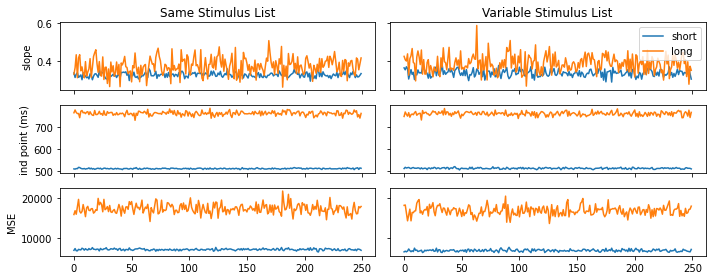

In [17]:
print('fixed K=8, tau=100, th=0.8, del=700, sig = 0.01')
fig, axs = plt.subplots(3,2, sharey='row', sharex=True, figsize=(10,4))

slope_short, slope_long, ind_short, ind_long, mse_short, mse_long = extract(short_stat, long_stat)

axs.flatten()[0].plot(slope_short, label='short')
axs.flatten()[0].plot(slope_long, label='long')
axs.flatten()[0].set_ylabel('slope')
axs.flatten()[0].set_title('Same Stimulus List')

axs.flatten()[2].plot(ind_short)
axs.flatten()[2].plot(ind_long)
axs.flatten()[2].set_ylabel('ind point (ms)')

axs.flatten()[4].plot(mse_short)
axs.flatten()[4].plot(mse_long)
axs.flatten()[4].set_ylabel('MSE')

slope_short, slope_long, ind_short, ind_long, mse_short, mse_long = extract(short_var, long_var)

axs.flatten()[1].plot(slope_short, label='short')
axs.flatten()[1].plot(slope_long, label='long')
axs.flatten()[1].legend()
axs.flatten()[1].set_title('Variable Stimulus List')

axs.flatten()[3].plot(ind_short)
axs.flatten()[3].plot(ind_long)

axs.flatten()[5].plot(mse_short)
axs.flatten()[5].plot(mse_long)

#plt.subplots_adjust(left=None, bottom=None, right=1.15, top=None, wspace=None, hspace=None)
plt.tight_layout()

# Optimizing $\sigma$ and CV 

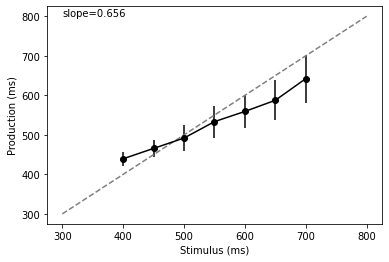

In [129]:
params = Params(ntrials=500, delay=700, tau=100, sigma=0.01, th=0.8)
expsim = ExperimentSimulation(params)

K = 14
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()

In [213]:
sigma_lst = [0,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.05,0.06,0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25]

In [200]:
K = 8.5
stds_s = []

for sigma in sigma_lst:

    params = Params(ntrials=500, delay=700, tau=100, th=0.7, sigma = sigma)
    expsim = ExperimentSimulation(params)
    exp_result = expsim.simulate(stimulus_lst_short, K)
    beh_result = exp_result.create_behavioral_data()
    stds_s.append(beh_result.production_stds)

In [201]:
K = 6
stds_l = []

for sigma in sigma_lst:

    params = Params(ntrials=500, delay=700, tau=100, th=0.7, sigma = sigma)
    expsim = ExperimentSimulation(params)
    exp_result = expsim.simulate(stimulus_lst_long, K)
    beh_result = exp_result.create_behavioral_data()
    stds_l.append(beh_result.production_stds)

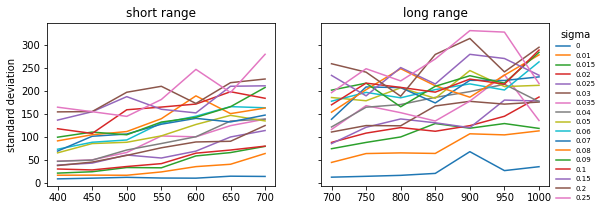

In [206]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(9,3))

for lst, sigma in zip(stds_s, sigma_lst):
    ax[0].plot(stimulus_range_s, lst, label=str(sigma))
ax[0].set_title('short range')
ax[0].set_ylabel('standard deviation')

for lst, sigma in zip(stds_l, sigma_lst):
    ax[1].plot(stimulus_range_l, lst, label=str(sigma))
ax[1].set_title('long range')

ax[1].legend(bbox_to_anchor=(1, 1), title='sigma', frameon=False,  prop={'size': 7})

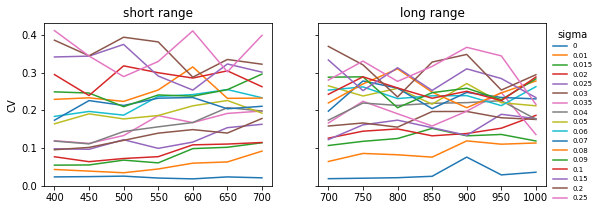

In [207]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(9,3))

for lst, sigma in zip(np.array(stds_s)/np.array(stimulus_range_s), sigma_lst):
    ax[0].plot(stimulus_range_s, lst, label=str(sigma))
ax[0].set_title('short range')
ax[0].set_ylabel('CV')

for lst, sigma in zip(np.array(stds_l)/np.array(stimulus_range_l), sigma_lst):
    ax[1].plot(stimulus_range_l, lst, label=str(sigma))
ax[1].set_title('long range')

ax[1].legend(bbox_to_anchor=(1, 1), title='sigma', frameon=False,  prop={'size': 7})

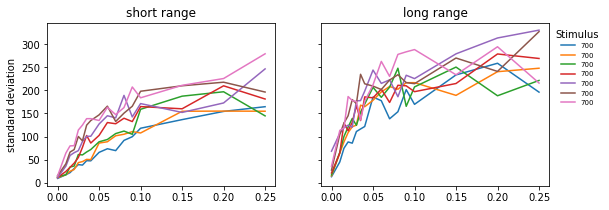

In [212]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(9,3))

for lst, sigma in zip(np.array(stds_s).T, stimulus_range_s):
    ax[0].plot(sigma_lst, lst, label=str(stimulus))
ax[0].set_title('short range')
ax[0].set_ylabel('standard deviation')

for lst, sigma in zip(np.array(stds_l).T, stimulus_range_l):
    ax[1].plot(sigma_lst, lst, label=str(stimulus))
ax[1].set_title('long range')

ax[1].legend(bbox_to_anchor=(1, 1), title='Stimulus', frameon=False,  prop={'size': 7})

## Mean over 10 simulations

In [216]:
K = 8.5

stds_s_mean = []
for sigma in sigma_lst:
    stds_si = []
    for i in range(11):
        params = Params(ntrials=500, delay=700, tau=100, th=0.7, sigma = sigma)
        expsim = ExperimentSimulation(params)
        exp_result = expsim.simulate(stimulus_lst_short, K)
        beh_result = exp_result.create_behavioral_data()
        stds_si.append(beh_result.production_stds)
    stds_s_mean.append(np.mean(stds_si, axis=0))

In [217]:
K = 6
stds_l_mean = []

for sigma in sigma_lst:
    stds_li = []
    for i in range(11):
        params = Params(ntrials=500, delay=700, tau=100, th=0.7, sigma = sigma)
        expsim = ExperimentSimulation(params)
        exp_result = expsim.simulate(stimulus_lst_long, K)
        beh_result = exp_result.create_behavioral_data()
        stds_li.append(beh_result.production_stds)
    stds_l_mean.append(np.mean(stds_li, axis=0))

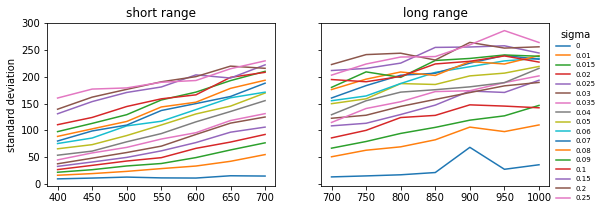

In [218]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(9,3))

for lst, sigma in zip(stds_s_mean, sigma_lst):
    ax[0].plot(stimulus_range_s, lst, label=str(sigma))
ax[0].set_title('short range')
ax[0].set_ylabel('standard deviation')

for lst, sigma in zip(stds_l_mean, sigma_lst):
    ax[1].plot(stimulus_range_l, lst, label=str(sigma))
ax[1].set_title('long range')

ax[1].legend(bbox_to_anchor=(1, 1), title='sigma', frameon=False,  prop={'size': 7})

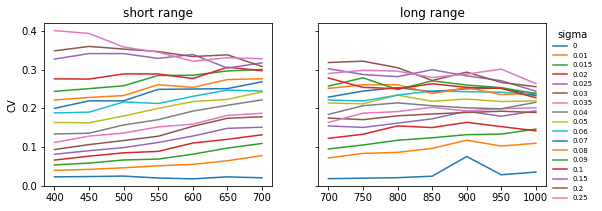

In [219]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(9,3))

for lst, sigma in zip(np.array(stds_s_mean)/np.array(stimulus_range_s), sigma_lst):
    ax[0].plot(stimulus_range_s, lst, label=str(sigma))
ax[0].set_title('short range')
ax[0].set_ylabel('CV')

for lst, sigma in zip(np.array(stds_l_mean)/np.array(stimulus_range_l), sigma_lst):
    ax[1].plot(stimulus_range_l, lst, label=str(sigma))
ax[1].set_title('long range')

ax[1].legend(bbox_to_anchor=(1, 1), title='sigma', frameon=False,  prop={'size': 7})

In [222]:
np.mean(np.array(stds_s_mean)/np.array(stimulus_range_s), axis=1)

array([0.0221595 , 0.05429255, 0.07689181, 0.09725781, 0.11608734,
       0.13616219, 0.15122037, 0.17457422, 0.19883149, 0.2189414 ,
       0.2371139 , 0.25017433, 0.27470188, 0.28753417, 0.32895849,
       0.3416124 , 0.3544551 ])

In [221]:
np.mean(np.array(stds_l_mean)/np.array(stimulus_range_l), axis=1)

array([0.03210604, 0.09580082, 0.1222834 , 0.14589523, 0.17255824,
       0.18362205, 0.19164515, 0.20431432, 0.22014795, 0.23442372,
       0.24400731, 0.24894816, 0.25858509, 0.25461916, 0.28196869,
       0.29088797, 0.28864519])

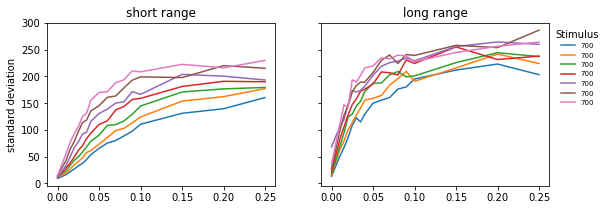

In [220]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(9,3))

for lst, sigma in zip(np.array(stds_s_mean).T, stimulus_range_s):
    ax[0].plot(sigma_lst, lst, label=str(stimulus))
ax[0].set_title('short range')
ax[0].set_ylabel('standard deviation')

for lst, sigma in zip(np.array(stds_l_mean).T, stimulus_range_l):
    ax[1].plot(sigma_lst, lst, label=str(stimulus))
ax[1].set_title('long range')

ax[1].legend(bbox_to_anchor=(1, 1), title='Stimulus', frameon=False,  prop={'size': 7})